In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import statsmodels.api as sm
import statsmodels.stats as sms
from scipy.stats import norm
import pylab

In [2]:
data = pd.read_csv('data.csv')
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [3]:
# Drop 'id'
data = data.drop('id', axis=1)

In [4]:
display(list(data.columns.values)) 

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

(array([ 93., 251., 101.,  47.,  51.,  14.,   6.,   3.,   1.,   2.]),
 array([ 143.5 ,  379.25,  615.  ,  850.75, 1086.5 , 1322.25, 1558.  ,
        1793.75, 2029.5 , 2265.25, 2501.  ]),
 <BarContainer object of 10 artists>)

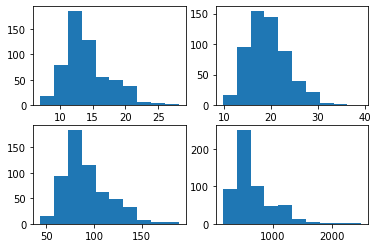

In [5]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2)
ax1.hist(data[['radius_mean']])
ax2.hist(data[['texture_mean']])
ax3.hist(data[['perimeter_mean']])
ax4.hist(data[['area_mean']])

(array([139., 174.,  76.,  57.,  66.,  23.,  15.,  12.,   2.,   5.]),
 array([0.     , 0.02012, 0.04024, 0.06036, 0.08048, 0.1006 , 0.12072,
        0.14084, 0.16096, 0.18108, 0.2012 ]),
 <BarContainer object of 10 artists>)

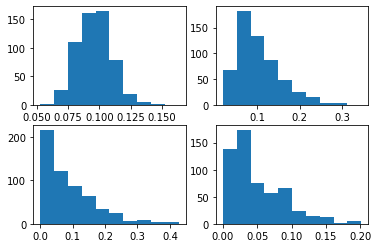

In [6]:
fig, ((ax5, ax6),(ax7, ax8)) = plt.subplots(2,2)
ax5.hist(data[['smoothness_mean']])
ax6.hist(data[['compactness_mean']])
ax7.hist(data[['concavity_mean']])
ax8.hist(data[['concave points_mean']])

(array([129., 220., 136.,  52.,  18.,   9.,   1.,   3.,   0.,   1.]),
 array([0.3602 , 0.81268, 1.26516, 1.71764, 2.17012, 2.6226 , 3.07508,
        3.52756, 3.98004, 4.43252, 4.885  ]),
 <BarContainer object of 10 artists>)

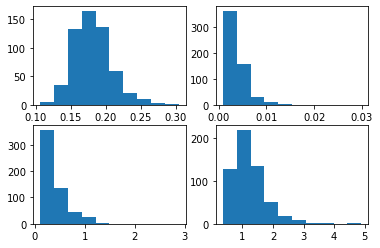

In [7]:
fig, ((ax9, ax10),(ax11, ax12)) = plt.subplots(2,2)
ax9.hist(data[['symmetry_mean']])
ax10.hist(data[['fractal_dimension_se']])
ax11.hist(data[['radius_se']])
ax12.hist(data[['texture_se']])

(array([200., 187., 105.,  39.,  19.,   7.,   7.,   4.,   0.,   1.]),
 array([0.002252 , 0.0155668, 0.0288816, 0.0421964, 0.0555112, 0.068826 ,
        0.0821408, 0.0954556, 0.1087704, 0.1220852, 0.1354   ]),
 <BarContainer object of 10 artists>)

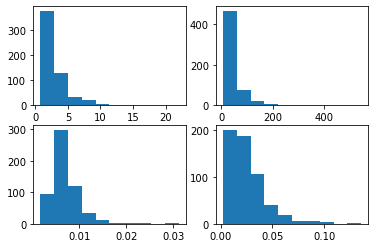

In [8]:
fig, ((ax13, ax14),(ax15, ax16)) = plt.subplots(2,2)
ax13.hist(data[['perimeter_se']])
ax14.hist(data[['area_se']])
ax15.hist(data[['smoothness_se']])
ax16.hist(data[['compactness_se']])

(array([361., 158.,  32.,  11.,   3.,   1.,   0.,   2.,   0.,   1.]),
 array([0.0008948 , 0.00378932, 0.00668384, 0.00957836, 0.01247288,
        0.0153674 , 0.01826192, 0.02115644, 0.02405096, 0.02694548,
        0.02984   ]),
 <BarContainer object of 10 artists>)

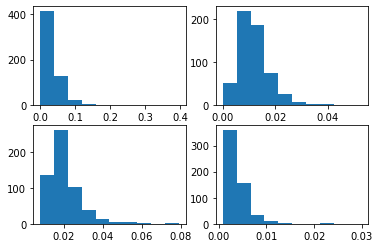

In [9]:
fig, ((ax17, ax18),(ax19, ax20)) = plt.subplots(2,2)
ax17.hist(data[['concavity_se']])
ax18.hist(data[['concave points_se']])
ax19.hist(data[['symmetry_se']])
ax20.hist(data[['fractal_dimension_se']])

(array([223., 193.,  58.,  51.,  25.,  10.,   4.,   4.,   0.,   1.]),
 array([ 185.2 ,  592.08,  998.96, 1405.84, 1812.72, 2219.6 , 2626.48,
        3033.36, 3440.24, 3847.12, 4254.  ]),
 <BarContainer object of 10 artists>)

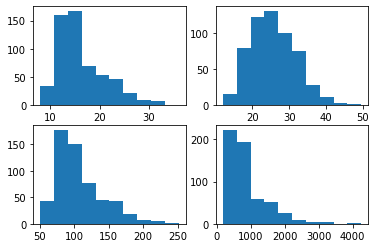

In [10]:
fig, ((ax21, ax22),(ax23, ax24)) = plt.subplots(2,2)
ax21.hist(data[['radius_worst']])
ax22.hist(data[['texture_worst']])
ax23.hist(data[['perimeter_worst']])
ax24.hist(data[['area_worst']])

(array([123., 245., 113.,  51.,  25.,   9.,   1.,   1.,   0.,   1.]),
 array([0.05504 , 0.070286, 0.085532, 0.100778, 0.116024, 0.13127 ,
        0.146516, 0.161762, 0.177008, 0.192254, 0.2075  ]),
 <BarContainer object of 10 artists>)

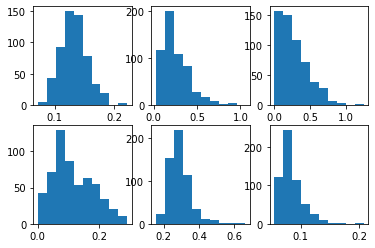

In [11]:
fig, ((ax25, ax26, ax27),(ax28, ax29, ax30)) = plt.subplots(2,3)
ax25.hist(data[['smoothness_worst']])
ax26.hist(data[['compactness_worst']])
ax27.hist(data[['concavity_worst']])
ax28.hist(data[['concave points_worst']])
ax29.hist(data[['symmetry_worst']])
ax30.hist(data[['fractal_dimension_worst']])

In [12]:
sps.shapiro(data[['symmetry_mean']])
# Test to verify that the distribution is not normal

ShapiroResult(statistic=0.972588062286377, pvalue=7.88199550072477e-09)

In [13]:
sps.shapiro(data[['smoothness_mean']])
# Test to verify that the distribution is not normal

ShapiroResult(statistic=0.987487256526947, pvalue=8.59934589243494e-05)

In [16]:
# Convert 'diagnosis' to binary 
data['diagnosis'] =data['diagnosis'].astype('category').cat.codes

In [20]:
from sklearn.model_selection import train_test_split
X, y = data.iloc[:, 1:].values, data.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)


In [25]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std =stdsc.transform(X_test)
#scaled_df = pd.DataFrame(scaled_df, columns=col_names)


In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_std, y_train)
pred = model.predict(X_test_std)

In [ ]:
fig, ((ax25, ax26, ax27),(ax28, ax29, ax30)) = plt.subplots(2,3)
ax25.hist(scaled_df[['smoothness_worst']])
ax26.hist(scaled_df[['compactness_worst']])
ax27.hist(scaled_df[['concavity_worst']])
ax28.hist(scaled_df[['concave points_worst']])
ax29.hist(scaled_df[['symmetry_worst']])
ax30.hist(scaled_df[['fractal_dimension_worst']])

In [30]:
pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int8)

In [31]:
y_test


array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int8)